__Data Source__ : https://catalog.data.gov/dataset/fatal-crashes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("philadelphia_fatal_crashes_clean.csv", index_col=False)

In [3]:
schema = pd.read_csv("schema.csv", index_col=False)
data_types = dict(zip(schema["column_name"], schema["data_type"]))
df = df.astype(data_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            796 non-null    int64         
 1   crash_id              796 non-null    Int64         
 2   year                  796 non-null    int32         
 3   police_district       796 non-null    category      
 4   crash_date            796 non-null    datetime64[ns]
 5   day_name              796 non-null    category      
 6   primary_street        796 non-null    string        
 7   age                   791 non-null    Float64       
 8   victim_gender         795 non-null    category      
 9   collision_type        796 non-null    string        
 10  hit_and_run           796 non-null    bool          
 11  primary_vehicle       796 non-null    category      
 12  secondary_vehicle     786 non-null    category      
 13  arrest_made         

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use("ggplot")

In [6]:
def plot_value_counts(
    df,
    count_column,
    title=None,
    xlabel=None,
    ylabel=None,
    color="steelblue",
    figsize=(10, 6),
    sort_descending=True,  # New parameter to control sorting
):
    """
    Creates a bar plot showing value counts for a specified column, sorted in descending order by default.

    Parameters:
    - df: DataFrame containing the data
    - count_column: Column name to count values from
    - title: Plot title (defaults to 'Count by {column_name}')
    - xlabel: X-axis label (defaults to column_name)
    - ylabel: Y-axis label (defaults to 'Count')
    - color: Bar color (defaults to 'steelblue')
    - figsize: Figure size (defaults to (10, 6))
    - sort_descending: Whether to sort bars in descending order (default: True)
    """
    # Get value counts and sort if requested
    value_counts = df[count_column].value_counts().rename("count").reset_index()
    value_counts.columns = [count_column, "count"]

    if sort_descending:
        value_counts = value_counts.sort_values("count", ascending=False)

    # Set default labels if none provided
    if title is None:
        title = f"Count by {count_column}"
    if xlabel is None:
        xlabel = count_column.replace("_", " ").title()
    if ylabel is None:
        ylabel = "Count"

    # Create the plot
    plt.figure(figsize=figsize)
    bar_plot = sns.barplot(
        data=value_counts,
        x=count_column,
        y="count",
        color=color,
        order=value_counts[count_column] if sort_descending else None,  # Enforce order
    )

    # Formatting
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Rotate x-labels if long
    if any(len(str(x)) > 5 for x in value_counts[count_column]):
        plt.xticks(rotation=45, ha="right")

    # Add count labels on bars
    for p in bar_plot.patches:
        bar_plot.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
            fontsize=10,
        )

    plt.tight_layout()
    plt.show()

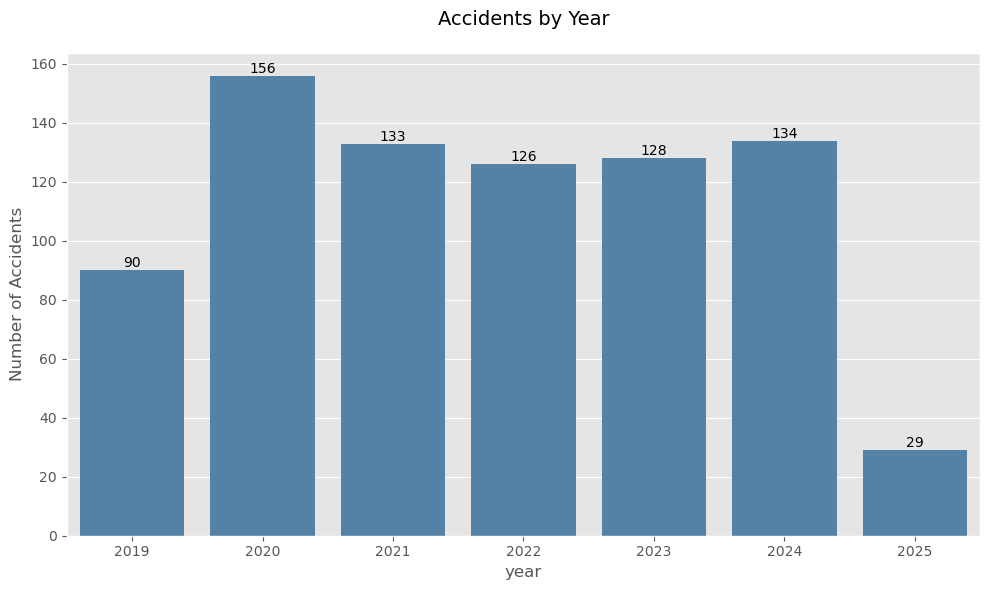

In [7]:
plot_value_counts(
    df,
    "year",
    "Accidents by Year",
    "year",
    "Number of Accidents",
    sort_descending=False,
)

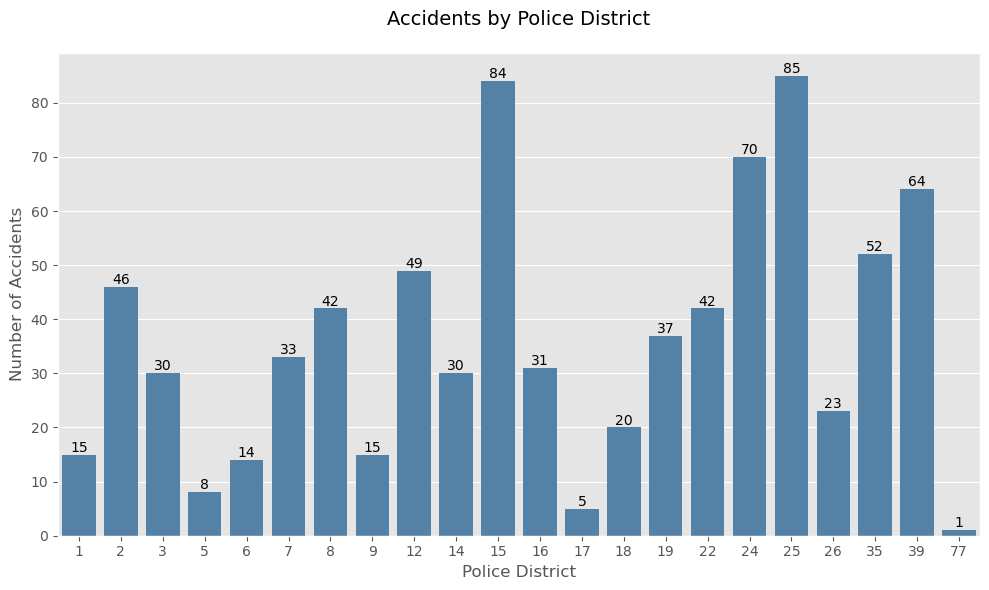

In [8]:
plot_value_counts(
    df,
    "police_district",
    "Accidents by Police District",
    "Police District",
    "Number of Accidents",
    sort_descending=False,
)

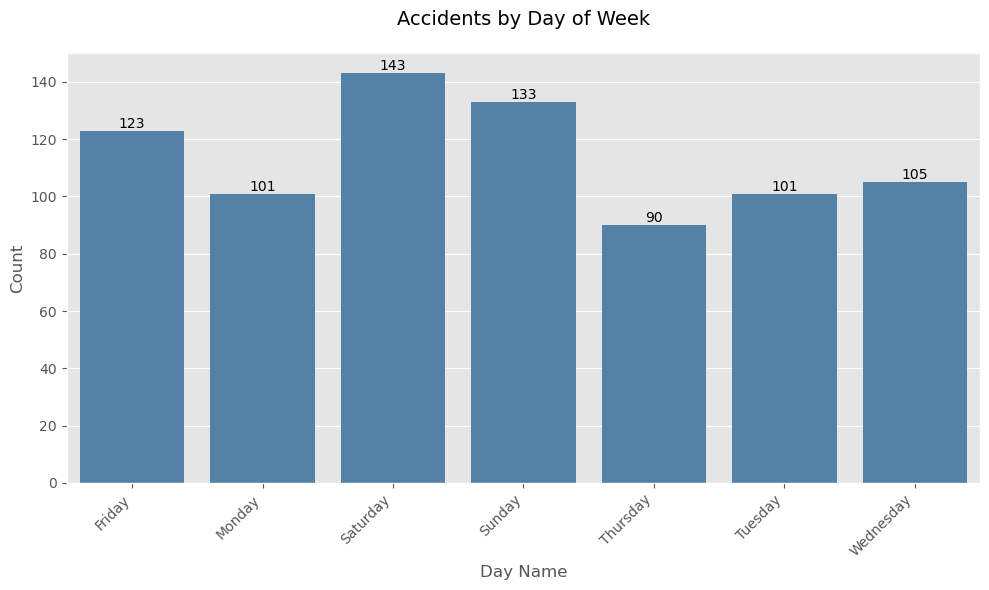

In [9]:
plot_value_counts(
    df, "day_name", title="Accidents by Day of Week", sort_descending=False
)

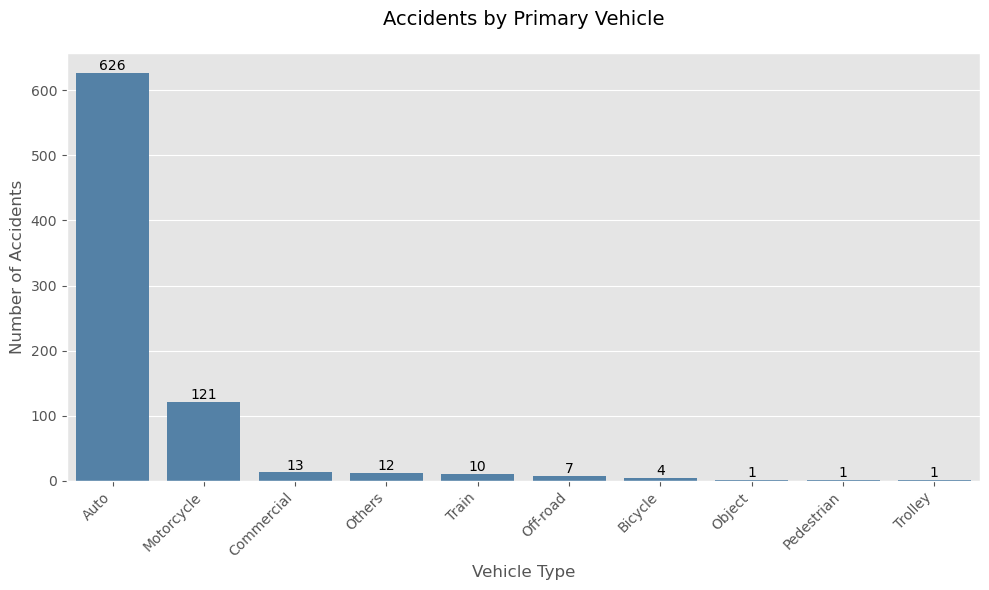

In [10]:
plot_value_counts(
    df,
    "primary_vehicle",
    "Accidents by Primary Vehicle",
    "Vehicle Type",
    "Number of Accidents",
)

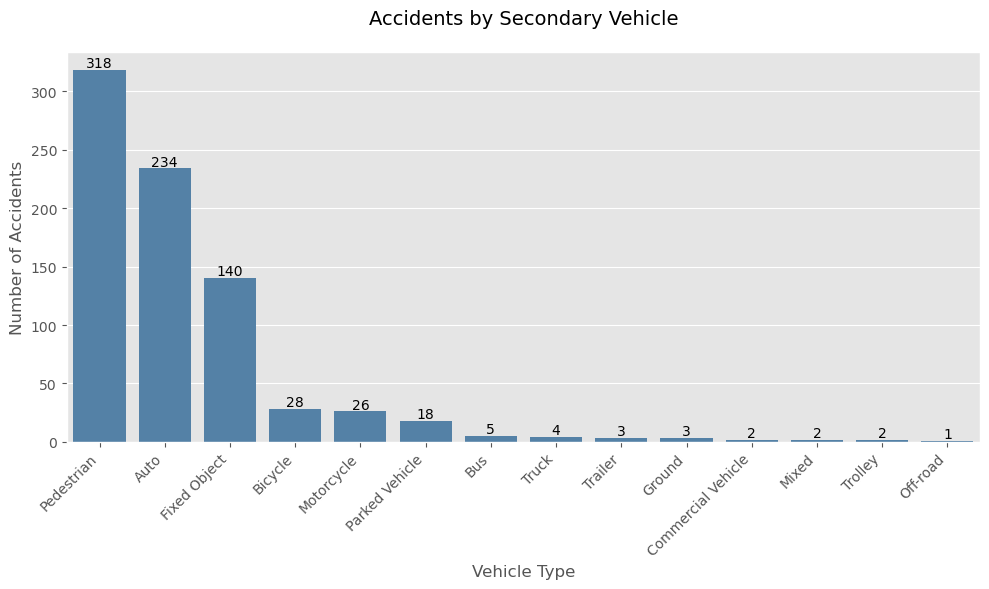

In [11]:
plot_value_counts(
    df,
    "secondary_vehicle",
    "Accidents by Secondary Vehicle",
    "Vehicle Type",
    "Number of Accidents",
)

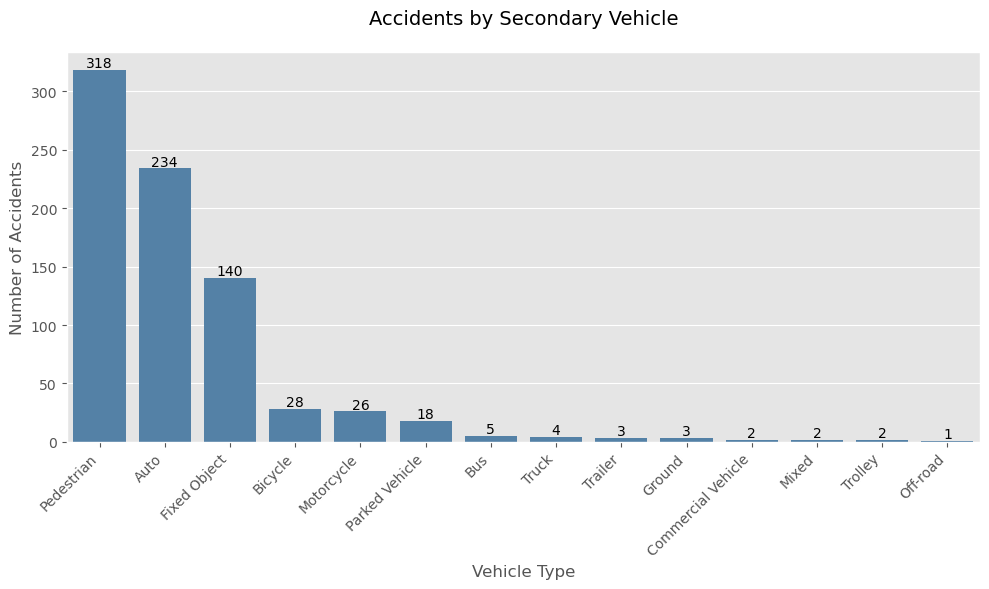

In [12]:
plot_value_counts(
    df,
    "secondary_vehicle",
    title="Accidents by Secondary Vehicle",
    xlabel="Vehicle Type",
    ylabel="Number of Accidents",
)

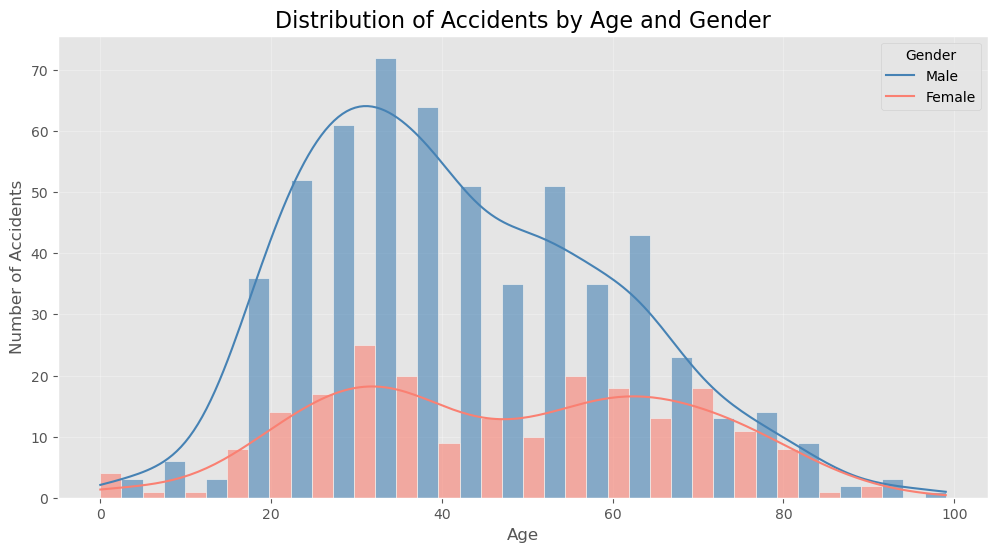

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="age",
    hue="victim_gender",
    bins=20,
    kde=True,
    palette={"M": "steelblue", "F": "salmon"},
    alpha=0.6,
    multiple="dodge",
)

plt.title("Distribution of Accidents by Age and Gender", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.grid(True, alpha=0.3)
plt.show()

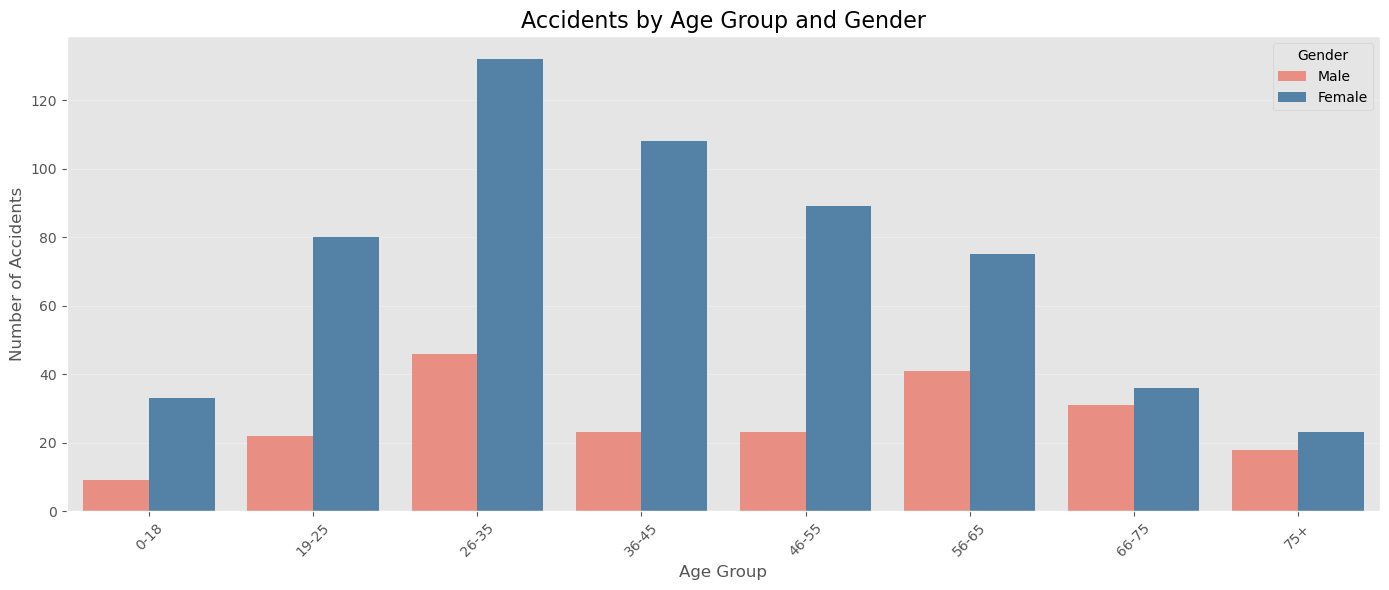

In [14]:
age_groups = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75+"]
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x="age_group",
    hue="victim_gender",
    palette={"M": "steelblue", "F": "salmon"},
    order=age_groups,  # Use predefined order instead of value counts
)

plt.title("Accidents by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()